### Введение

#### Цель работы:

Необходимо определить:
 - откуда приходят пользователи и какими устройствами они пользуются;
 - сколько стоит привлечение пользователей из различных рекламных каналов;
 - сколько денег приносит каждый клиент;
 - когда расходы на привлечение клиента окупаются;
 - какие факторы мешают привлечению клиентов.

#### Описание проекта

Вы — маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Ваша задача — разобраться в причинах и помочь компании выйти в плюс, основываясь на данных о пользователях, привлечённых с 1 мая по 27 октября 2019 года

### Используемые библиотеки и модули

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
from scipy import stats as st
from math import factorial

import time
from datetime import datetime
from datetime import date, timedelta
from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import seaborn as sns
sns.set(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(10, 8)})
import matplotlib.pyplot as plt
# %config InlineBackend.figure_format = 'svg' 

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

#### **VISITS**

In [3]:
print(visits.info())
print(f'Дубликаты: {visits.duplicated().sum()}')
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
None
Дубликаты: 0


,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [4]:
visits.columns = visits.columns.str.lower()
visits.columns = visits.columns.str.replace(' ','_')
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


#### **ORDERS**

In [5]:
print(orders.info())
print(f'Дубликаты: {orders.duplicated().sum()}')
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None
Дубликаты: 0


,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(' ','_')
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


#### **COSTS**

In [7]:
print(costs.info())
print(f'Дубликаты: {costs.duplicated().sum()}')
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None
Дубликаты: 0


,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [8]:
costs.columns = costs.columns.str.lower()
costs.columns = costs.columns.str.replace(' ','_')
costs['dt'] = pd.to_datetime(costs['dt'])
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


#### Выводы
   3 датасета содержат информацию о посещениях сайта, покупках и расходах на рекламу. Пропусков в данных нет, дубликаты также отсутствуют. Тип  данных для дат был приведен к `datetime64`. Типы данных в каждой таблице соотвутствуют их реальному содержимому. Названия колонок во всех таблицах изменены согласно PEP-8.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

В нашем исследовании мы принимаем за горизонт анализа 2 недели, а за точку наблюдения - 1 ноября.

In [9]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

#### Функции для вычисления значений метрик

In [10]:
def get_profiles(
    sessions, 
    orders, 
    ad_costs
):

    # сортируем сессии по ID пользователя и дате привлечения
    # группируем по ID и находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
         # время первого посещения назовём first_ts
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()  # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
         # столбец с числом пользователей назовём unique_users
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()  # возвращаем dt и channel из индексов
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    # по дате и каналу привлечения
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    # результаты сохраним в столбец acquisition_cost (CAC)
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавим стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # органические пользователи не связаны с данными о рекламе,
    # поэтому в столбце acquisition_cost у них значения NaN
    # заменим их на ноль, ведь стоимость привлечения равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    
    return profiles  # возвращаем профили с CAC

In [11]:
#Проверка
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [12]:
def get_retention(
    profiles, 
    sessions, 
    observation_date, 
    horizon_days, 
    dimensions = [], 
    ignore_horizon = False
):
    
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    
    # исключаем пользователей, не «доживших» до горизонта анализа 
    # тех, которые присоединились позже, чем observation_date - horizon
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(days = horizon_days - 1)
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(sessions[['user_id', 'session_start']], on = 'user_id', how = 'left')
    result_raw['lifetime'] = (result_raw['session_start'] - result_raw['first_ts']).dt.days
    
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):     
        result = df.pivot_table(index = dims, columns = 'lifetime', values = 'user_id', aggfunc = 'nunique')     # строим «треугольную таблицу» 
        cohort_sizes = df.groupby(dims).agg({'user_id': 'nunique'}).rename(columns = {'user_id': 'cohort_size'}) # определяем размеры когорт
        result = cohort_sizes.merge(result, on = dims, how = 'left').fillna(0)                                   # присоединяем размеры когорт к «треугольной» таблице
        result = result.div(result['cohort_size'], axis = 0)                                                     # делим каждую «ячейку» на соответствующий размер когорты и получаем retention rate
        result = result[['cohort_size'] + list(range(horizon_days))]                                             # исключаем все лайфтаймы, превышающие горизонт анализа
        result['cohort_size'] = cohort_sizes                                                                     # восстанавливаем размеры когорт
        return result
    
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    
    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(result_raw, dimensions + ['dt'], horizon_days)
    
    # возвращаем обе таблицы и сырые данные
    # сырые данные пригодятся, если нужно будет отыскать ошибку в расчётах
    return result_raw, result_grouped, result_in_time

In [13]:
#Проверка
retention = get_retention(profiles, visits, observation_date, horizon_days, dimensions=['device'])

In [14]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу конверсии
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        # считаем сумму с накоплением для каждой строки
        result = result.fillna(0).cumsum(axis = 1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # добавляем размеры когорт в таблицу конверсии
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [15]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # сохраняем в датафрейм данные пользователей и значения CAC, 
        # добавив параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

#### Функции для построения графиков

In [16]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [17]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [18]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [19]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 15))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    cac_history = roi_history[['cac']]
    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Профили пользователей

In [20]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [21]:
print(
    f'Минимальная дата привлечения пользователей: {profiles["first_ts"].min()}; \
    \nМаксимальная дата привлечения пользователей: {profiles["first_ts"].max()}'
)

Минимальная дата привлечения пользователей: 2019-05-01 00:00:41;     
Максимальная дата привлечения пользователей: 2019-10-27 23:59:04


Поскольку в данных содержится информация о новых пользователях, пришедших с 1 мая по 27 октября 2019 года, то и максимальная и минимальная даты привлечения равны началу и концу временного отрезка базы данных. Таким образом, минимальная дата - это **1 мая 2019 года**, а максимальная - **27 октября 2019 года**. 

 #### Распределение пользователей по странам

In [22]:
profiles['region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

In [23]:
result = (
        profiles.groupby('region').agg({
                'user_id': 'nunique',
                'payer': 'mean'
        }).sort_values('user_id', ascending=False) 
    )

result['payer'] = round(result['payer'] * 100, 2)
result = result.rename({'user_id': 'Кол-во пользователей', 'payer': 'Процент платящих'}, axis=1)

result

,Кол-во пользователей,Процент платящих
region,,
United States,100002,6.90
UK,17575,3.98
France,17450,3.80
Germany,14981,4.11


Три четверти пользователей - жители США, четверть - из Европы. 

Доля платящих пользователей из США самая высокая 6.9%, из стран Европы доля составляет примерно 4%.

#### Распределение пользователей по устройствам

In [24]:
profiles['device'].unique()

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

In [25]:
result = (
        profiles.groupby('device').agg({
                'user_id': 'nunique',
                'payer': 'mean'
        }).sort_values('user_id', ascending=False) 
    )

result['payer'] = round(result['payer'] * 100, 2)
result['Кол-во платящих пользователей'] = profiles.query('payer == True').groupby('device')['user_id'].count()
result = result.rename({'user_id': 'Кол-во пользователей', 'payer': 'Процент платящих'}, axis=1)

result[['Кол-во пользователей', 'Кол-во платящих пользователей', 'Процент платящих']]

,Кол-во пользователей,Кол-во платящих пользователей,Процент платящих
device,,,
iPhone,54479,3382,6.21
Android,35032,2050,5.85
PC,30455,1537,5.05
Mac,30042,1912,6.36


In [26]:
result = (
        profiles.query('region != "United States"').groupby('device').agg({
                'user_id': 'nunique',
                'payer': 'mean'
        }).sort_values('user_id', ascending=False) 
    )

result['payer'] = round(result['payer'] * 100, 2)
result['Кол-во платящих пользователей'] = profiles.query('payer == True').groupby('device')['user_id'].count()
result = result.rename({'user_id': 'Кол-во пользователей', 'payer': 'Процент платящих'}, axis=1)

result[['Кол-во пользователей', 'Кол-во платящих пользователей', 'Процент платящих']]

,Кол-во пользователей,Кол-во платящих пользователей,Процент платящих
device,,,
PC,20023,1537,4.11
Android,14833,2050,3.80
iPhone,9950,3382,3.90
Mac,5200,1912,3.96


Среди пользователей больше всего владельцев iPhone, а доля платящих выше среди владельцев Mac. Наименьшее количество платящих пользователей пользуются PC.

Это связано с тем, что продукция Apple пользуется большой популярностью в США, а данный регион является основным для продукта. Если рассматривать европейский регион, то основными устройствами будет PC. Причем из 19150 пользователей 12730 пользователей приходится на европейский регион.

#### Распределение пользователей по рекламным каналам

In [27]:
result = (
        profiles.groupby('channel').agg({
                'user_id': 'nunique',
                'payer': 'mean'
        }).sort_values('user_id', ascending=False) 
    )

result['payer'] = round(result['payer'] * 100, 2)
result = result.rename({'user_id': 'Кол-во пользователей', 'payer': 'Процент платящих'}, axis=1)
result['Кол-во платящих пользователей'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
result = result.rename({'user_id': 'Кол-во пользователей', 'payer': 'Процент платящих'}, axis=1)

result[['Кол-во пользователей', 'Кол-во платящих пользователей', 'Процент платящих']].sort_values('Кол-во платящих пользователей', ascending=False)

,Кол-во пользователей,Кол-во платящих пользователей,Процент платящих
channel,,,
FaceBoom,29144,3557,12.20
TipTop,19561,1878,9.60
organic,56439,1160,2.06
WahooNetBanner,8553,453,5.30
AdNonSense,3880,440,11.34
RocketSuperAds,4448,352,7.91
LeapBob,8553,262,3.06
OppleCreativeMedia,8605,233,2.71
lambdaMediaAds,2149,225,10.47


Максимальное количество покупателей привлекают площадки FaceBoom и TipTop, 3557 пользователей и 1878 пользвателей соответственно. Также стоит обратить внимание на площадки AdNonSense и lambdaMediaAds. Хоть и количество пользователей с этих площадок невелико, но приходящие пользователи чаще приносят прибыль. Так, на 3880 пользователей площадки AdNonSense 440 пользователей являются платящими, что составляет 11.34%. А из 2149 пользователей площадки lambdaMediaAds прибыль приносят 225 пользователей, что составляет 10.47%. 

#### Выводы

На пользователей пришедших с 1 мая по 27 октября 2019 года приходится следующая статистика:

 - Три четверти пользователей - жители США, четверть - из Европы;

 - Доля платящих пользователей из США самая высокая 6.9%, из стран Европы доля составляет примерно 4%;
 - Среди пользователей больше всего владельцев iPhone, а доля платящих выше среди владельцев Mac. Наименьшее количество платящих пользователей пользуются PC;
 - Максимальное количество покупателей привлекают площадки FaceBoom и TipTop, 3557 пользователей и 1878 пользвателей соответственно.
 
 Также стоит обратить внимание на площадки AdNonSense и lambdaMediaAds. Хоть и количество пользователей с этих площадок невелико, но приходящие пользователи чаще приносят прибыль. Так, на 3880 пользователей площадки AdNonSense 440 пользователей являются платящими, что составляет 11.34%. А из 2149 пользователей площадки lambdaMediaAds прибыль приносят 225 пользователей, что составляет 10.47%. 

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [28]:
print(f'Общая сумма расходов на маркетинг составляет: {round(costs["costs"].sum(), 2)}')

Общая сумма расходов на маркетинг составляет: 105497.3


In [29]:
result = (
    costs.pivot_table(index='channel', values='costs', aggfunc='sum')
         .sort_values('costs', ascending=False)
      )

result.style.background_gradient('coolwarm')

,costs
channel,
TipTop,54751.300000
FaceBoom,32445.600000
WahooNetBanner,5151.000000
AdNonSense,3911.250000
OppleCreativeMedia,2151.250000
RocketSuperAds,1833.000000
LeapBob,1797.600000
lambdaMediaAds,1557.600000
MediaTornado,954.480000


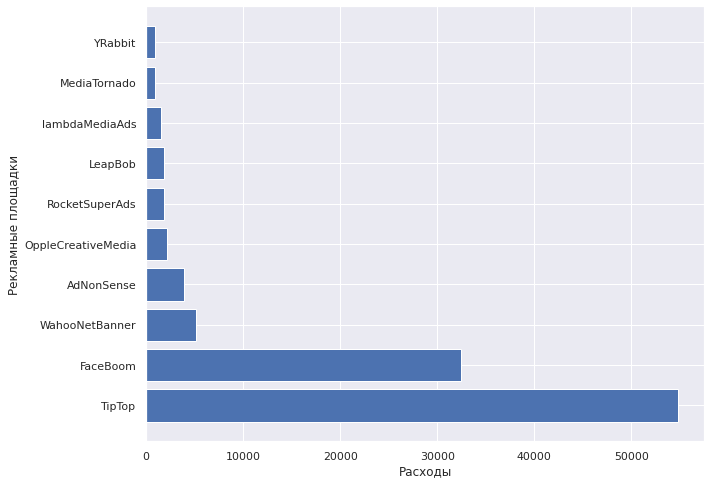

In [30]:
plt.barh(
         result.index, 
         result['costs'],
)
plt.xlabel('Расходы')
plt.ylabel('Рекламные площадки')
plt.show()

Общая сумма расходов на маркетинг: 105497. Из которых больше всего было потрачено на маркетинг на площадках TipTop и FaceBoom.

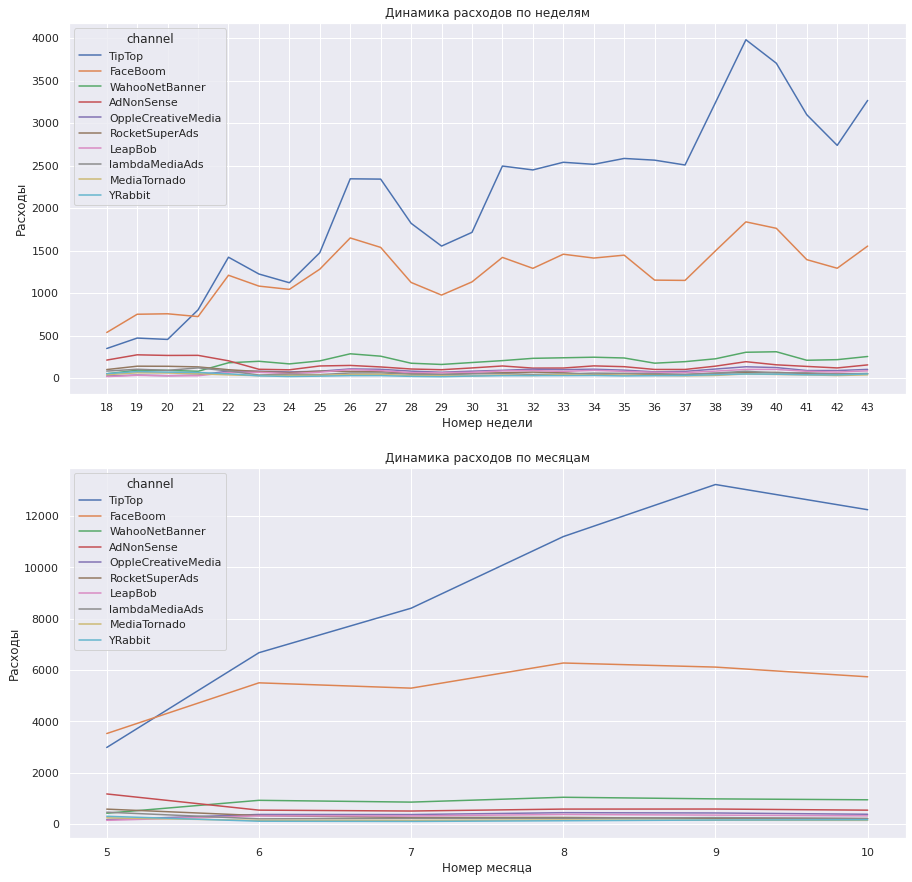

In [31]:
costs_another = costs
costs_another['week'] = costs['dt'].dt.isocalendar().week
costs_another['month'] = costs['dt'].dt.month

plt.figure(figsize=(15, 15))

week = costs_another.pivot_table(
                                 index='channel', 
                                 columns='week', 
                                 values='costs', 
                                 aggfunc='sum'
                                )

week = week.T[result.index.tolist()].T

week.T.plot(
    grid=True, 
    xticks=list(week.columns), 
    ax=plt.subplot(2, 1, 1),
    xlabel = 'Номер недели',
    ylabel = 'Расходы'
)
plt.title('Динамика расходов по неделям')

month = costs_another.pivot_table(
                                  index='channel', 
                                  columns='month', 
                                  values='costs', 
                                  aggfunc='sum'
                                 )

month = month.T[result.index.tolist()].T

month.T.plot(
    grid=True, 
    xticks=list(month.columns), 
    ax=plt.subplot(2, 1, 2),
    xlabel = 'Номер месяца',
    ylabel = 'Расходы'
)
plt.title('Динамика расходов по месяцам')
plt.show()

In [32]:
week.style.background_gradient('coolwarm')

week,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
channel,,,,,,,,,,,,,,,,,,,,,,,,,,
TipTop,347.000000,470.000000,454.000000,801.800000,1421.200000,1223.600000,1121.000000,1474.400000,2343.600000,2340.000000,1820.000000,1552.200000,1713.400000,2493.600000,2448.000000,2538.000000,2514.000000,2583.000000,2563.000000,2506.000000,3241.000000,3979.500000,3703.000000,3097.500000,2737.000000,3265.500000
FaceBoom,535.700000,750.200000,755.700000,722.700000,1208.900000,1081.300000,1042.800000,1280.400000,1647.800000,1536.700000,1124.200000,975.700000,1130.800000,1419.000000,1290.300000,1456.400000,1411.300000,1445.400000,1151.700000,1148.400000,1496.000000,1837.000000,1761.100000,1392.600000,1291.400000,1552.100000
WahooNetBanner,49.200000,92.400000,90.000000,79.200000,179.400000,196.800000,166.200000,201.600000,285.000000,256.800000,174.000000,159.600000,182.400000,204.600000,231.600000,238.200000,244.800000,235.800000,174.600000,192.600000,226.200000,303.000000,309.000000,208.800000,216.000000,253.200000
AdNonSense,211.050000,273.000000,265.650000,266.700000,202.650000,102.900000,96.600000,141.750000,148.050000,130.200000,106.050000,97.650000,118.650000,141.750000,116.550000,117.600000,142.800000,133.350000,100.800000,100.800000,139.650000,192.150000,155.400000,136.500000,118.650000,154.350000
OppleCreativeMedia,24.000000,34.500000,27.500000,34.250000,81.750000,79.500000,71.500000,79.750000,107.000000,102.500000,81.000000,68.000000,80.750000,90.750000,104.000000,98.500000,103.750000,92.750000,72.750000,78.000000,105.750000,132.250000,123.000000,88.250000,88.000000,101.500000
RocketSuperAds,99.450000,139.230000,138.060000,131.040000,97.695000,76.050000,63.180000,80.730000,78.260000,75.075000,55.965000,41.860000,54.600000,61.880000,69.615000,62.010000,40.300000,51.350000,40.625000,40.950000,56.225000,63.700000,66.300000,51.675000,46.475000,50.700000
LeapBob,16.800000,31.710000,26.670000,26.670000,65.520000,66.990000,52.290000,68.460000,99.750000,87.360000,62.580000,61.110000,67.200000,83.580000,87.570000,77.490000,90.510000,77.910000,66.990000,63.840000,81.270000,101.220000,101.010000,78.960000,69.720000,84.420000
lambdaMediaAds,81.600000,103.200000,90.400000,119.200000,83.200000,35.200000,45.600000,40.000000,59.200000,60.000000,44.800000,41.600000,49.600000,52.000000,41.600000,46.400000,57.600000,54.400000,52.000000,41.600000,57.600000,80.000000,59.200000,60.800000,47.200000,53.600000
MediaTornado,38.640000,61.680000,59.040000,50.160000,36.960000,27.600000,29.760000,32.160000,40.560000,43.440000,28.800000,26.400000,25.200000,35.040000,29.040000,40.800000,35.280000,33.840000,30.240000,25.920000,30.240000,48.240000,42.000000,36.960000,29.040000,37.440000


In [33]:
month.style.background_gradient('coolwarm')

month,5,6,7,8,9,10
channel,,,,,,
TipTop,2981.000000,6675.600000,8410.200000,11202.000000,13232.500000,12250.000000
FaceBoom,3524.400000,5501.100000,5294.300000,6274.400000,6114.900000,5736.500000
WahooNetBanner,418.800000,921.000000,851.400000,1040.400000,977.400000,942.000000
AdNonSense,1169.700000,538.650000,504.000000,579.600000,581.700000,537.600000
OppleCreativeMedia,169.750000,370.000000,366.500000,439.250000,427.750000,378.000000
RocketSuperAds,577.980000,325.715000,252.070000,253.110000,218.400000,205.725000
LeapBob,140.280000,314.580000,313.530000,369.810000,343.980000,315.420000
lambdaMediaAds,458.400000,199.200000,219.200000,220.000000,247.200000,213.600000
MediaTornado,238.560000,138.000000,138.480000,154.560000,144.720000,140.160000


In [34]:
month[9].sum()

22441.340000000004

Увеличение расходов началось с 20 недели для площадки TipTop и с 21 недели для площадки FaceBoom. Пик расходов зафиксирован на 39-й неделе(сентябрь). Суммарный расход за эту неделю для двух площадок составляет 5816, а за сентябрь равен 19346. В остальных источниках увеличения рекламного бюджета не наблюдается

In [35]:
cac_channel = (
              profiles.query('channel != "organic"')
                      .pivot_table(index='channel', values='acquisition_cost', aggfunc='mean') 
                      .sort_values(by='acquisition_cost', ascending=False) 
                      .rename(columns={'acquisition_cost':'cac'}) 
                      .reset_index()
)

cac_channel.style.background_gradient('coolwarm')

,channel,cac
0,TipTop,2.799003
1,FaceBoom,1.113286
2,AdNonSense,1.008054
3,lambdaMediaAds,0.724802
4,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
6,OppleCreativeMedia,0.250000
7,YRabbit,0.218975
8,MediaTornado,0.218717
9,LeapBob,0.210172


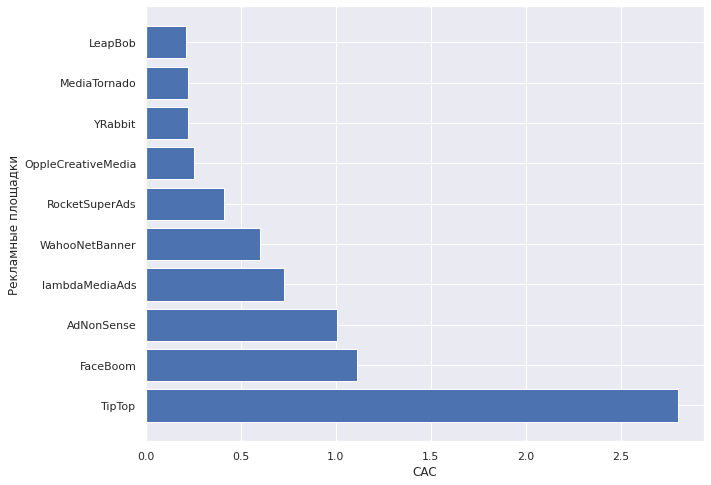

In [36]:
plt.barh(
         cac_channel['channel'], 
         cac_channel['cac'],
)
plt.xlabel('CAC')
plt.ylabel('Рекламные площадки')
plt.show()

Дороже всего обходится пользователь, которого привлекли из площадки TipTop (2.80 за пользователя), далее идет FaceBoom и AdNonSense (1.11 и 1.01 соответственно).

#### Выводы


- Общая сумма расходов на маркетинг: 105497. Из которых больше всего было потрачено на маркетинг на площадках TipTop и FaceBoom, суммарные расходы на эти 2 площадки составляют 90% от всех расходов. 
- Наиболее ресурсозатратным стал сентябрь, в этот месяце было потрачено 22441, из которых 19346 приходится на TipTop и FaceBoom.
- Дороже всего обходится пользователь, которого привлекли из площадки TipTop (2.80 за пользователя), далее идет FaceBoom и AdNonSense (1.11 и 1.01 соответственно).


### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

####  Окупаемость рекламы

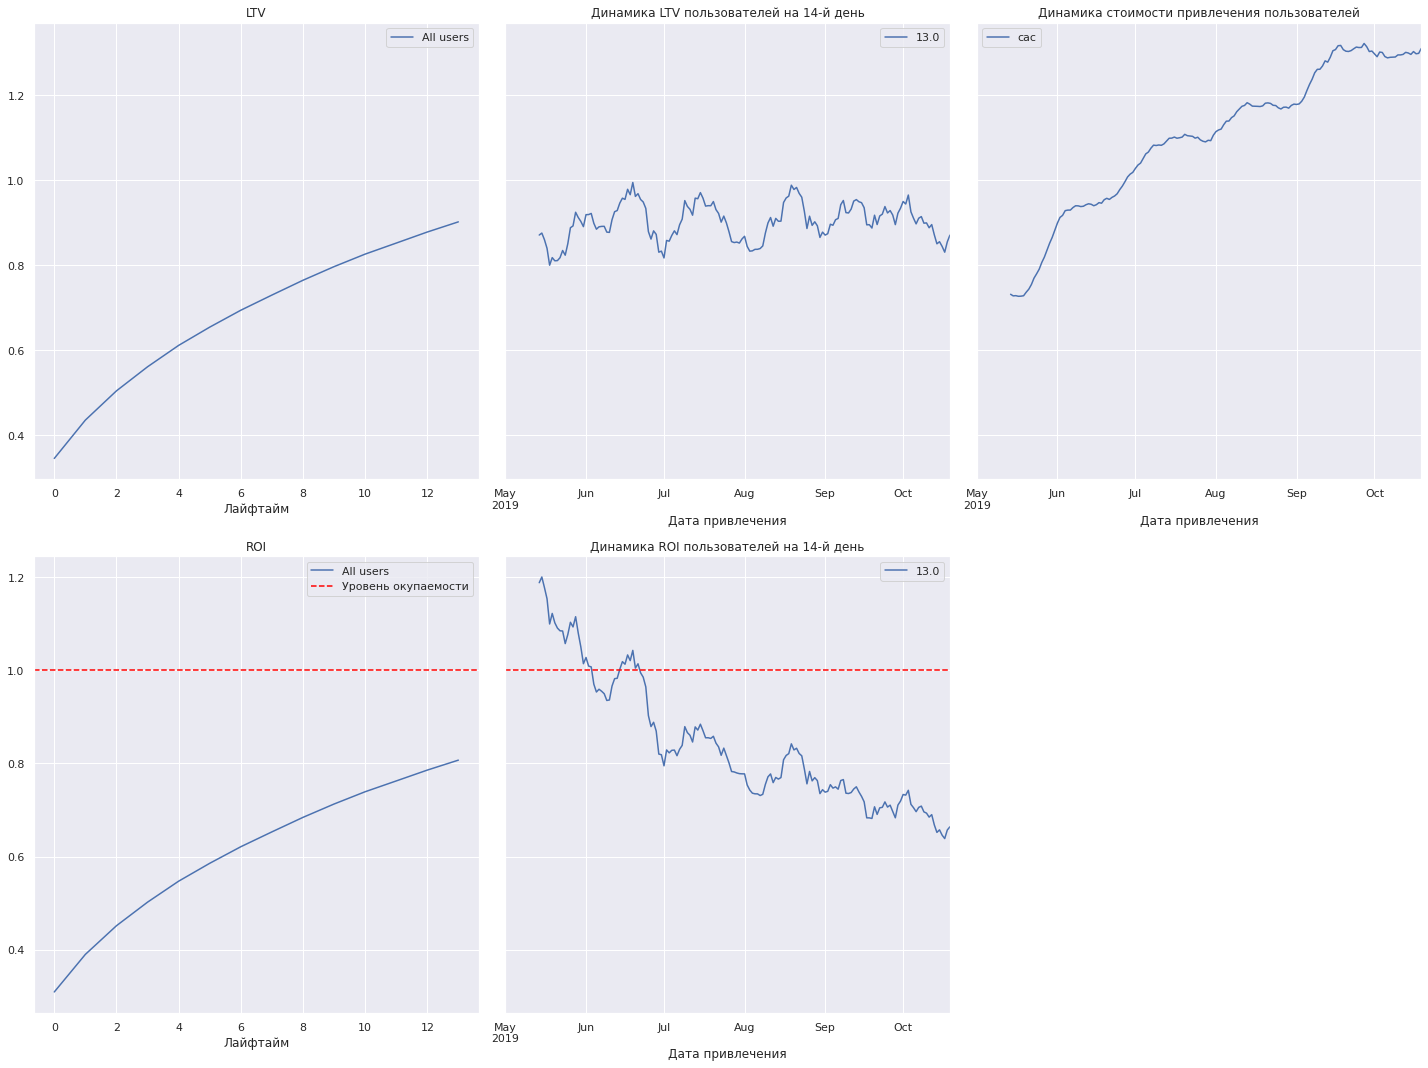

In [37]:
profiles = profiles.query('channel != "organic"')

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
                                                      profiles, 
                                                      orders,
                                                      observation_date, 
                                                      horizon_days
                                                     )

plot_ltv_roi(
             ltv, 
             ltv_history, 
             roi, 
             roi_history, 
             horizon_days,
             window=14
)


- Реклама не окупается к концу 2-ой недели. ROI — около 80%;
- Заметно что динамика LTV пользователей подвержена сезонности;
- На всем протяжении рассматриваемого времени стоимость привлечения пользователей растет;
- ROI пользователей падает. Начиная с июня уровень окупаемости стал меньше 1, к октябрю уровень ROI достиг значения 0.65.

#### Конверсия и удержание пользователей

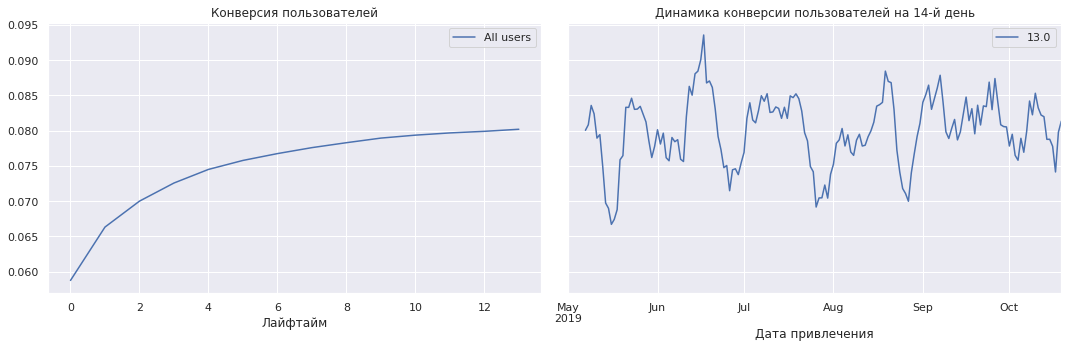

In [38]:
conversion_raw, conversion, conversion_history = get_conversion(
                                                                profiles, 
                                                                orders, 
                                                                observation_date, 
                                                                horizon_days
                                                            )

plot_conversion(conversion, conversion_history, horizon_days)

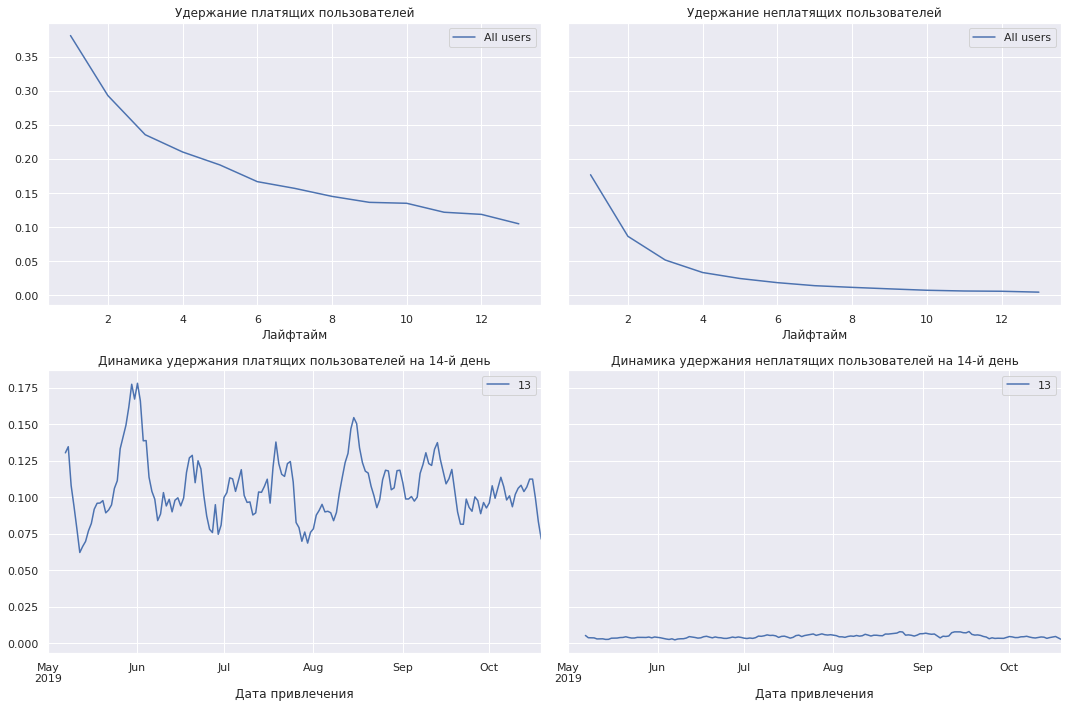

In [39]:
retention_raw, retention, retention_history = get_retention(
                                                            profiles, 
                                                            visits, 
                                                            observation_date,
                                                            horizon_days)

plot_retention(retention, retention_history, horizon_days)


- Конверсия пользователей на протяжении 14 дней постепенно растет. Однако, к 14 дню конверсия начинает выходить на плато;
- Динамика конверсии пользователей имеет сезонность, к началу каждого месяца она падает. Это следствие LTV пользователей, который также имеет сезонный характер;
- За лайфтайм удержание платящих пользователей падает, примерно, в 3 раза, с 0.37 до 0.1. Неплатящие же пользователи и вовсе забывают про продукт на 14 день;
- Динамика удержания платящих пользователей, в среднем, находнится у значения 0.1;

#### Окупаемость рекламы с разбивкой по устройствам

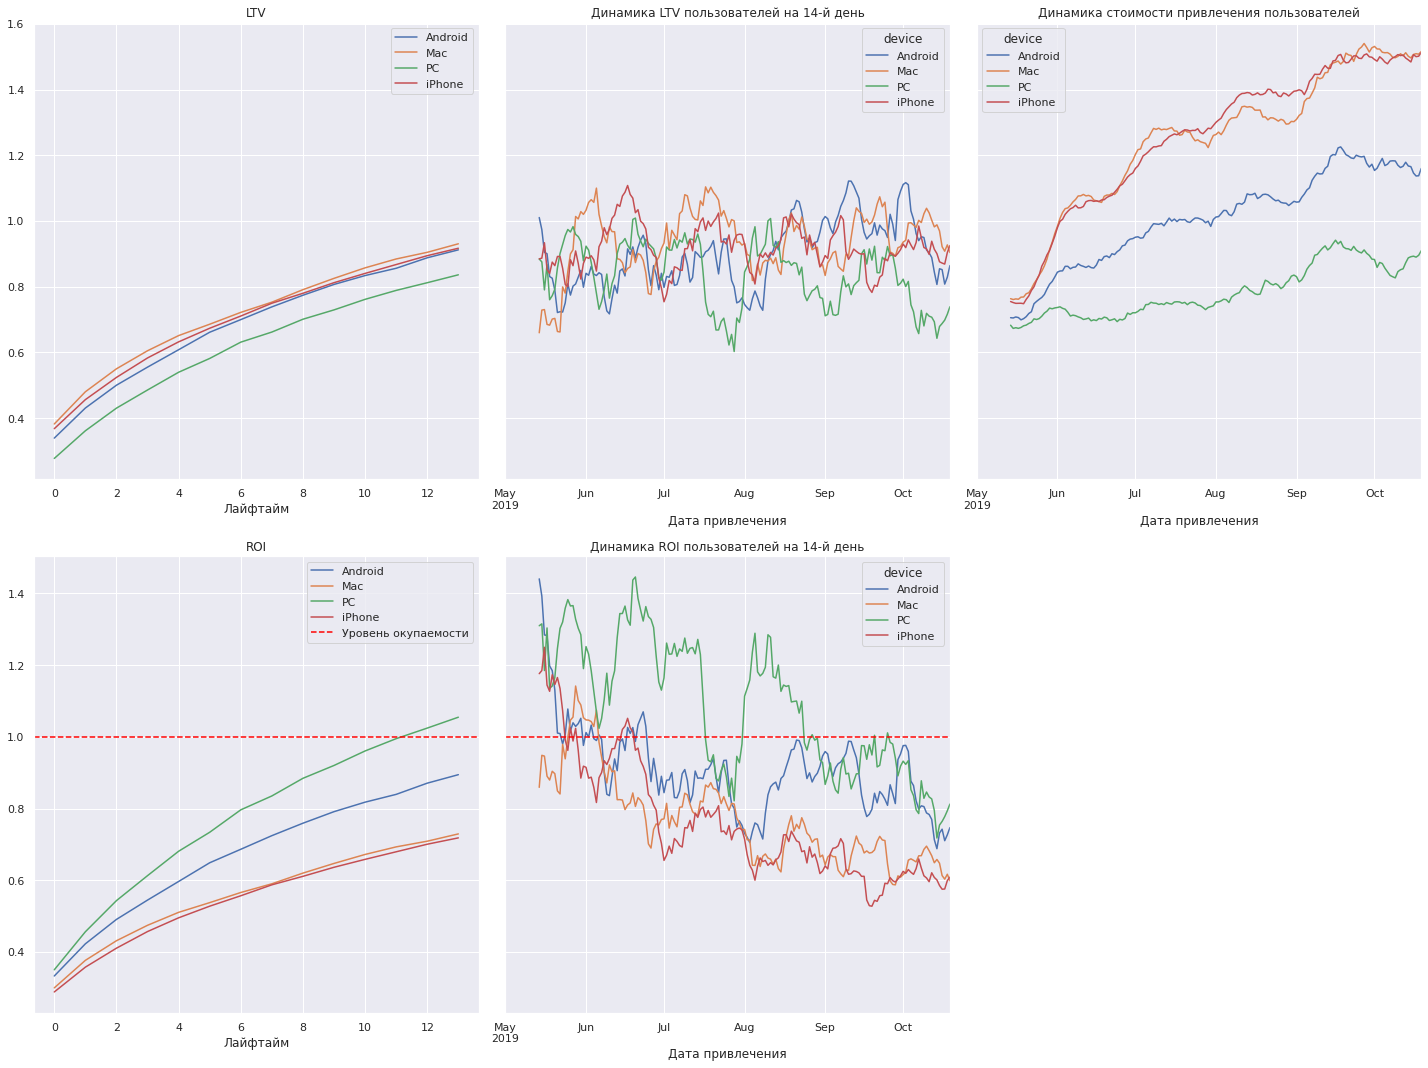

In [40]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
                                                      profiles, 
                                                      orders, 
                                                      observation_date,
                                                      horizon_days, 
                                                      dimensions=['device']
                                                     )
plot_ltv_roi(ltv, 
             ltv_history,
             roi, 
             roi_history, 
             horizon_days,
             window = 14
            )


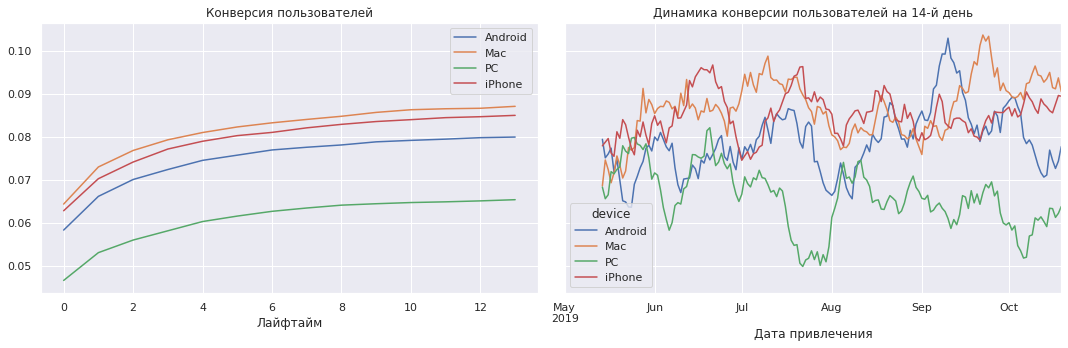

In [41]:
conversion_raw, conversion, conversion_history = get_conversion(
                                                                profiles, 
                                                                orders, 
                                                                observation_date, 
                                                                horizon_days,
                                                                ['device']
                                                            )

plot_conversion(conversion, conversion_history, horizon_days, window=14)

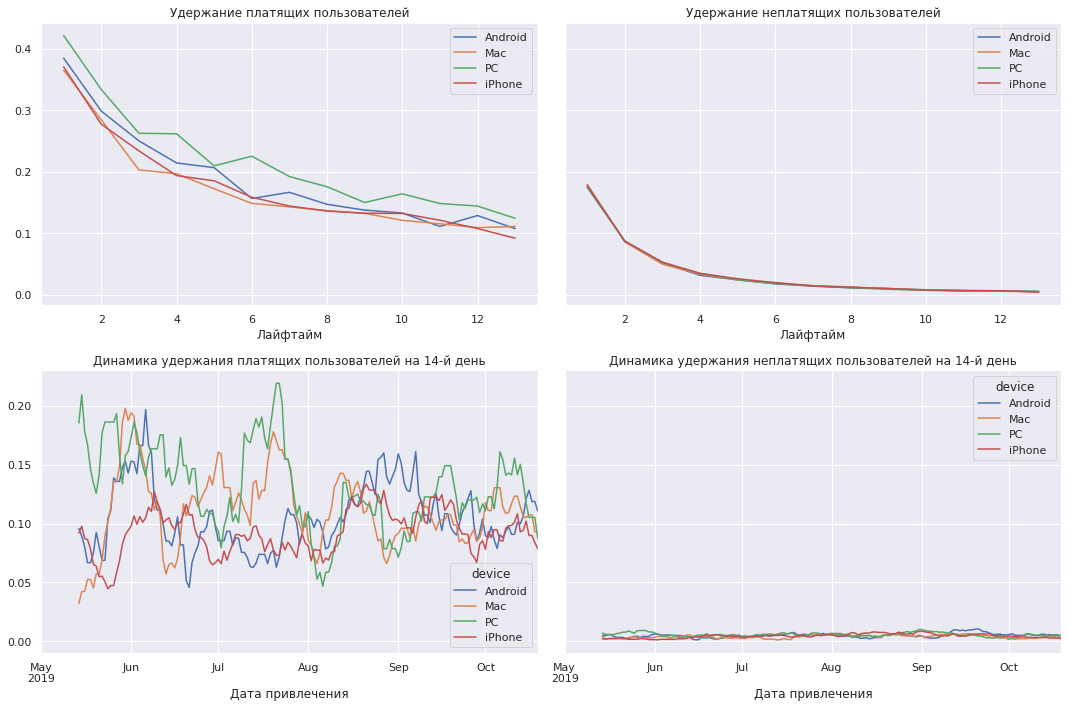

In [42]:
retention_raw, retention, retention_history = get_retention(
                                                            profiles, 
                                                            visits, 
                                                            observation_date,
                                                            horizon_days, 
                                                            ['device']
)

plot_retention(retention, retention_history, horizon_days, window=14)


- ROI пользователей PC на 14 день выходит на уровень окупаемости, ROI всех остальных устройств ниже уровня. Однако, судя по динамике ROI, вскоре и пользователи PC перестанут окупаться, так как начиная с сентября значение ROI стало меньше 1, для другие устройства перестали окупаться с июня. Стоимость привлечения пользователей всех устройств росла за рассматриваемый период.
- Все устройства хорошо конверсируются. В лидерах устройства производста компании Apple. Конверсия пользователей, использующие PC, наименьшее.
- Неплатящие пользователи удерживаются плохо, а из платящих лучше всего удерживаются пользователи PC, хуже - владельцы устройств производста Apple.

#### Окупаемость рекламы с разбивкой по странам

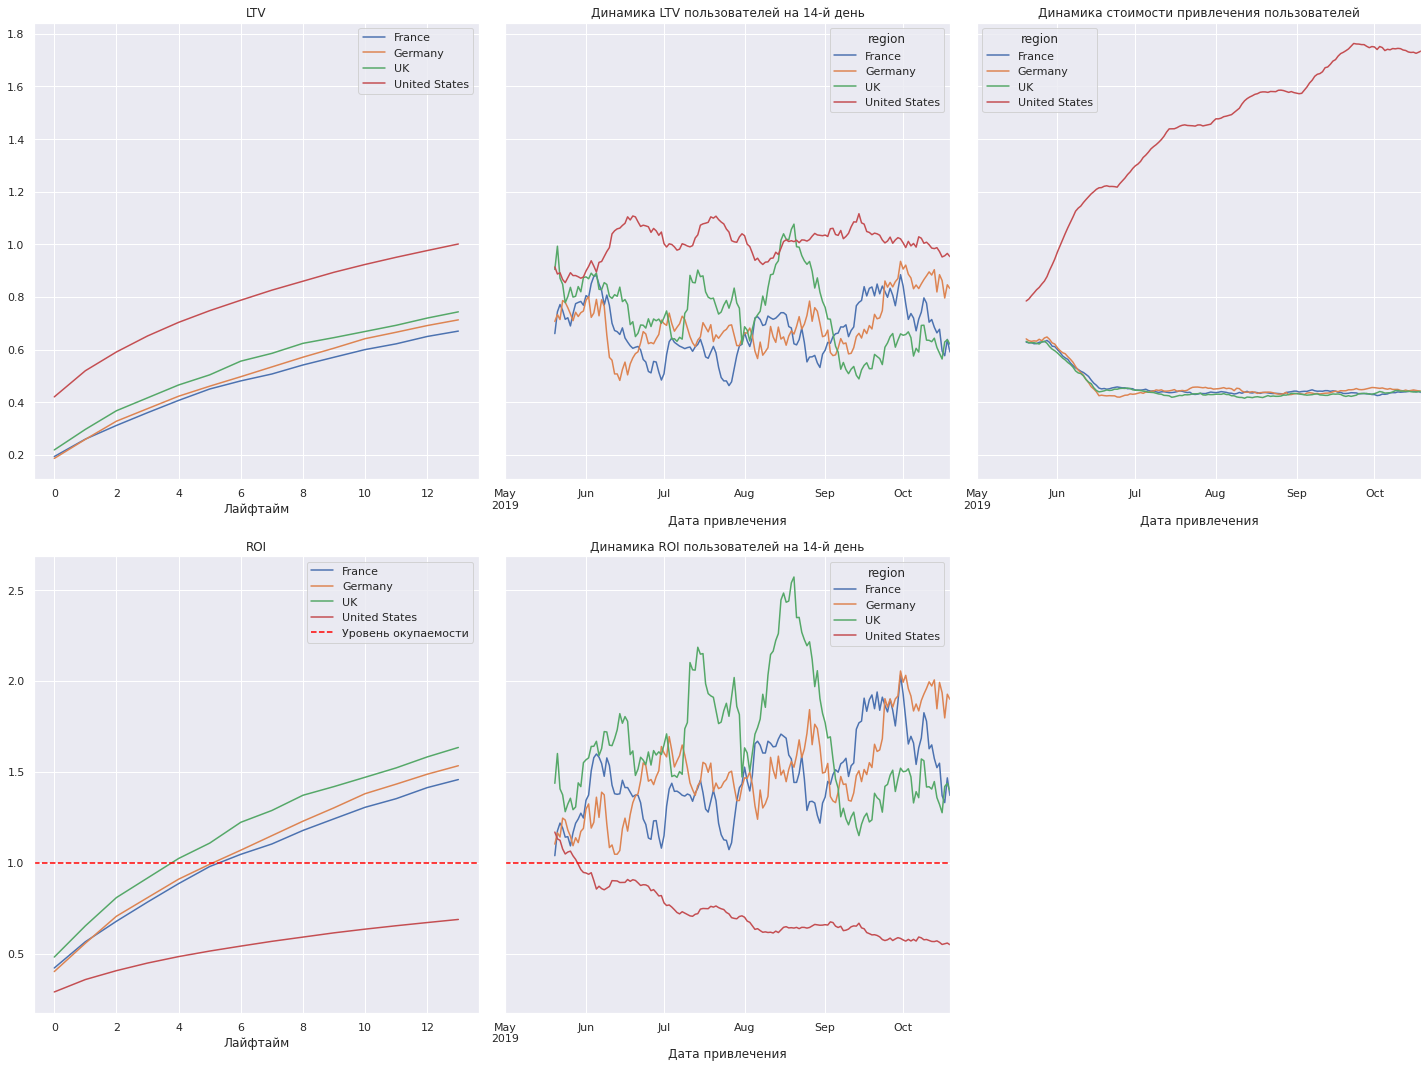

In [43]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
                                                      profiles, 
                                                      orders, 
                                                      observation_date,
                                                      horizon_days, 
                                                      dimensions=['region']
                                                     )
plot_ltv_roi(ltv, 
             ltv_history,
             roi, 
             roi_history, 
             horizon_days,
             window = 20
            )

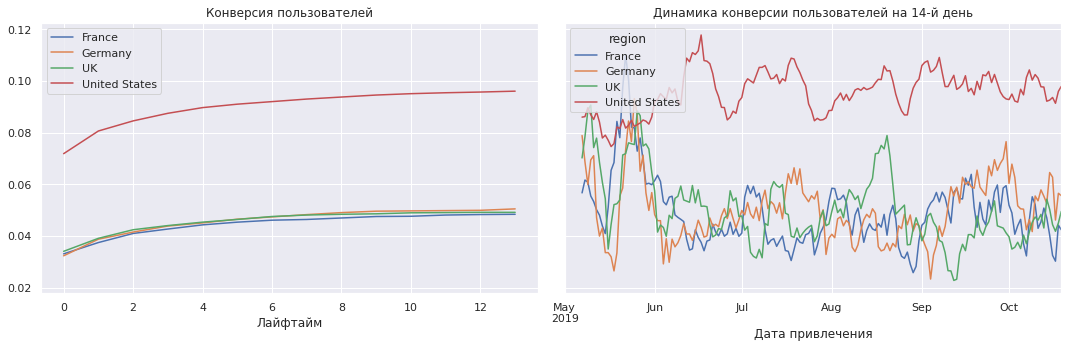

In [44]:
conversion_raw, conversion, conversion_history = get_conversion(
                                                                profiles, 
                                                                orders, 
                                                                observation_date, 
                                                                horizon_days,
                                                                ['region']
                                                            )

plot_conversion(conversion, conversion_history, horizon_days)

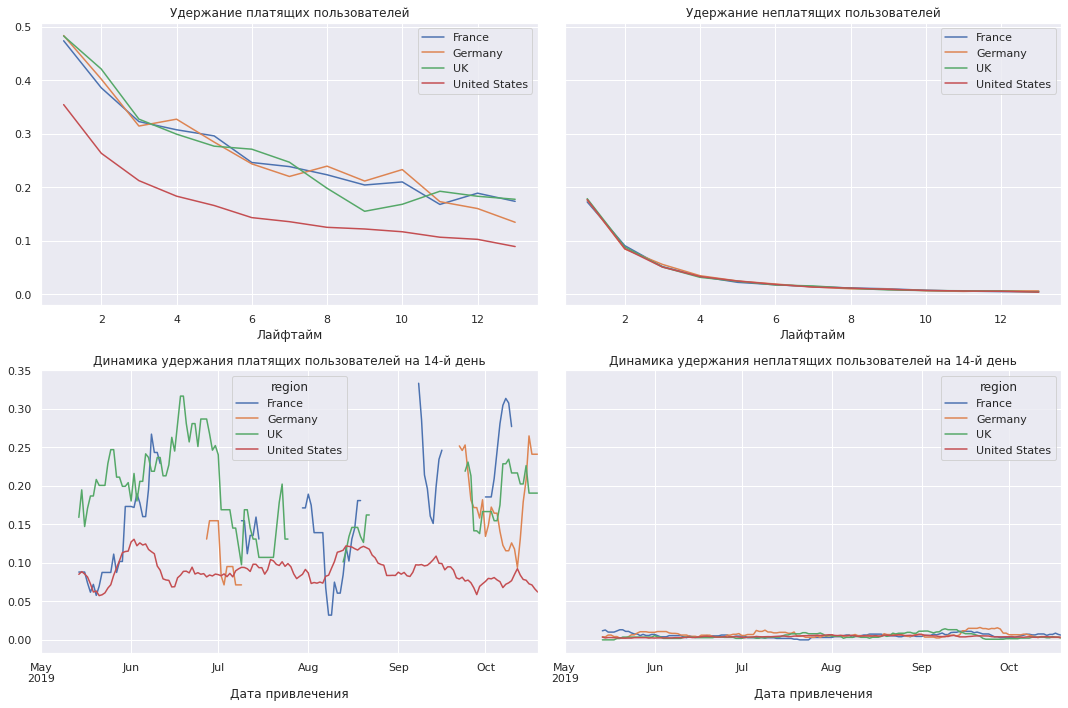

In [45]:
retention_raw, retention, retention_history = get_retention(
                                                            profiles, 
                                                            visits, 
                                                            observation_date,
                                                            horizon_days, 
                                                            ['region']
)

plot_retention(retention, retention_history, horizon_days, window=14)

- В США уровень окупаемости рекламы низкая, причем данный регион является основным. Стоимость привлечения пользователей из США значительно превосходит другие страны, также она растет на всем проятежении врмени. Стоимость привлечения пользователей из други регионов, начиная с середины июня, выходит на значение 0.4 и удерживается на всем протяжении времени. Лучше всего окупается Англия и Германия. LTV всё так же подвержен сезонности;
- Слабая конверсия у пользователей из Англии, Германии и Франции. Однако, их доля относительно пользователей из США значительно меньше;
- Пользователи из США хуже всего удерживаются.

#### Окупаемость рекламы с разбивкой по рекламным каналам

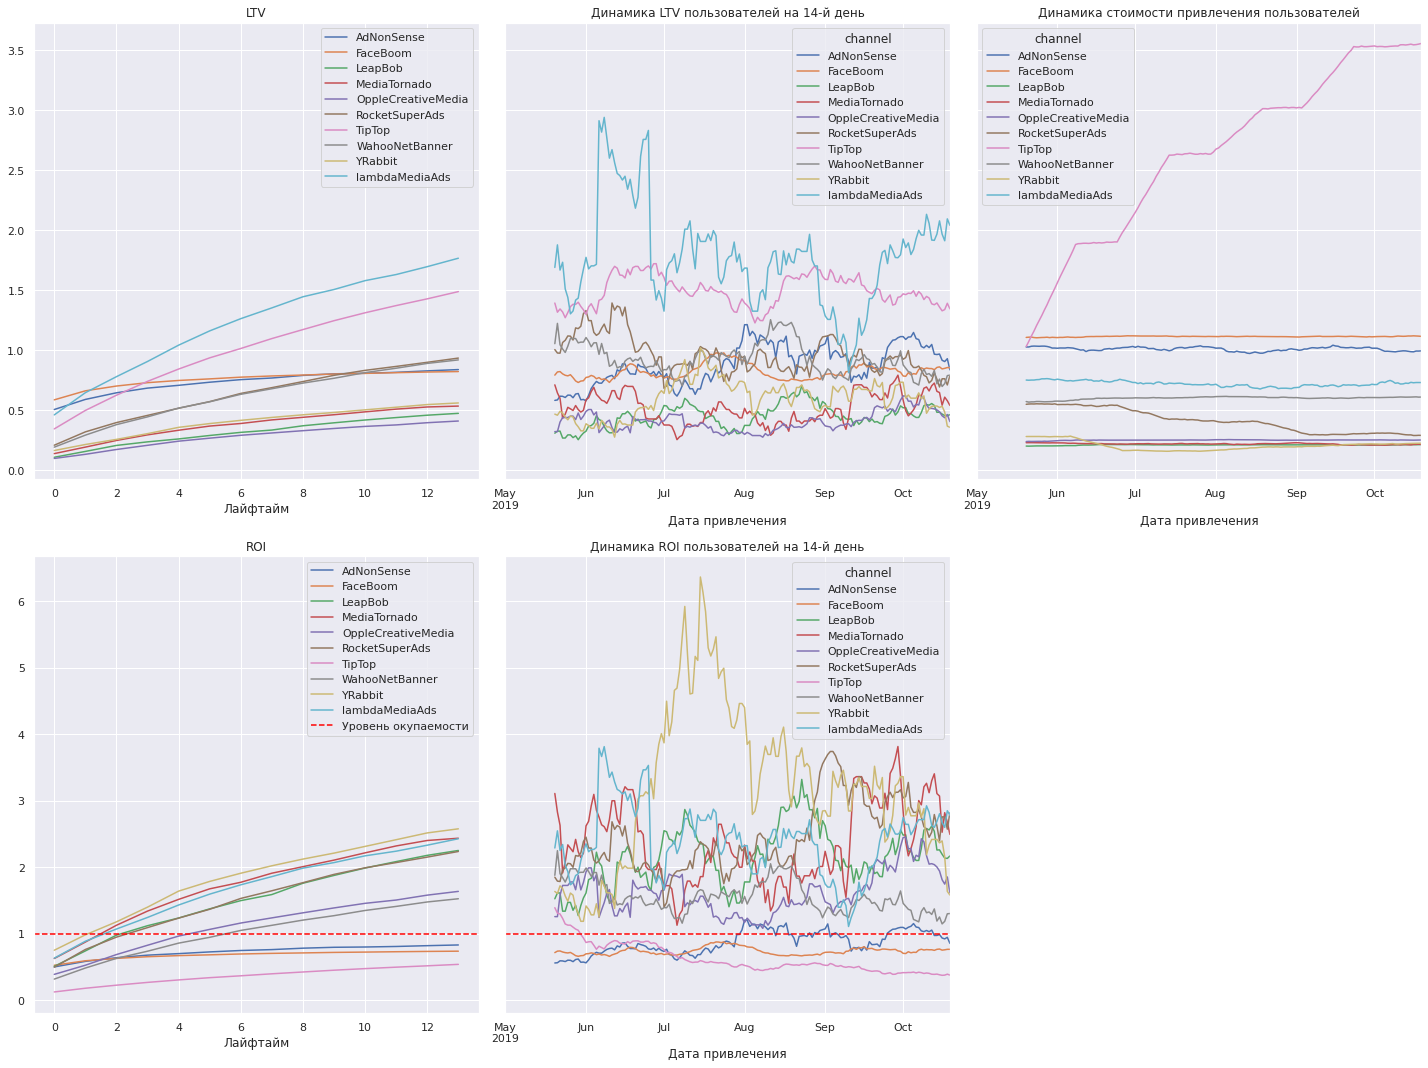

In [46]:
ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(
                                                      profiles, 
                                                      orders, 
                                                      observation_date,
                                                      horizon_days, 
                                                      dimensions=['channel']
                                                     )
plot_ltv_roi(ltv, 
             ltv_history,
             roi, 
             roi_history, 
             horizon_days,
             window=20
            )

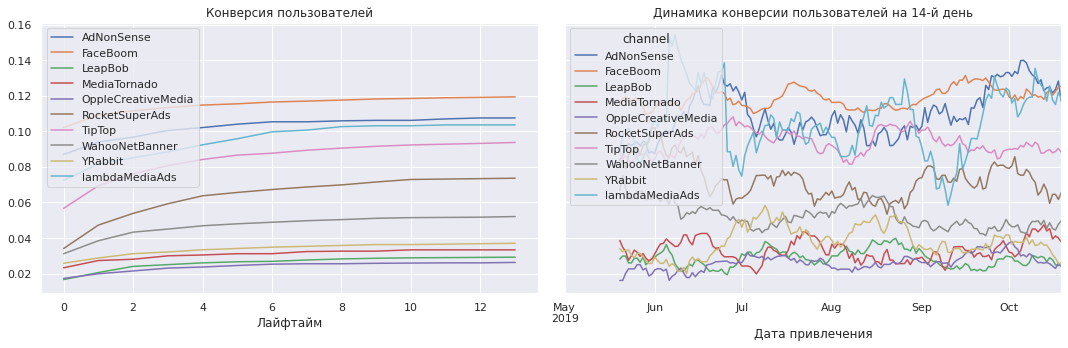

In [47]:
conversion_raw, conversion, conversion_history = get_conversion(
                                                                profiles, 
                                                                orders, 
                                                                observation_date, 
                                                                horizon_days,
                                                                ['channel']
                                                            )

plot_conversion(conversion, conversion_history, horizon_days, window=20)

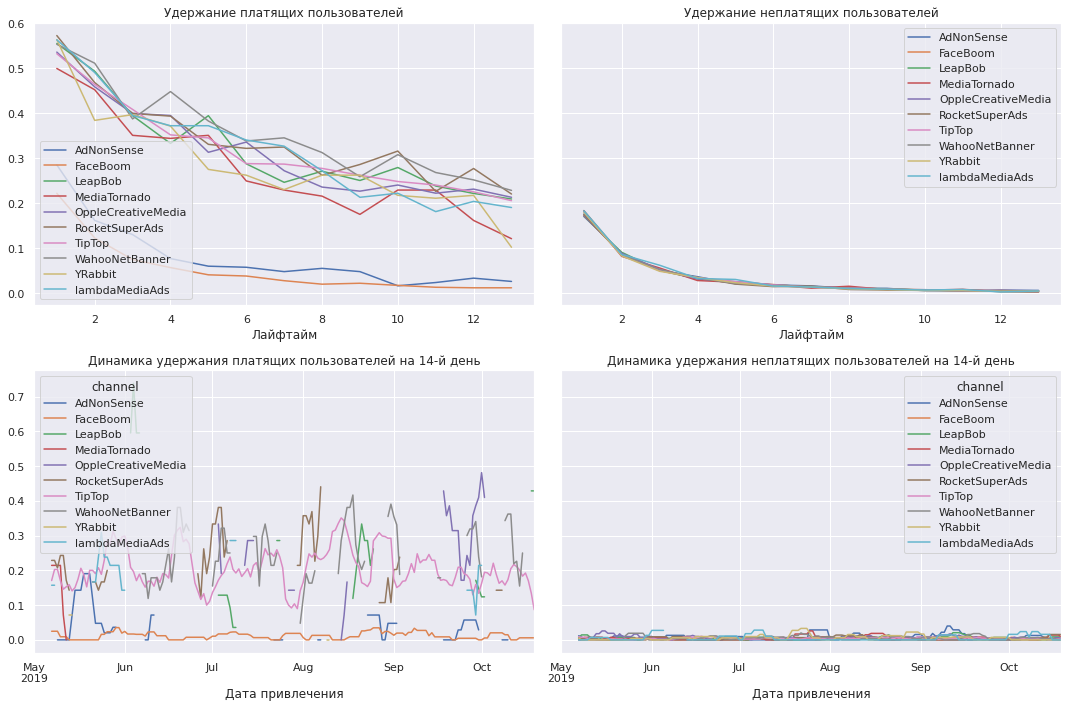

In [48]:
retention_raw, retention, retention_history = get_retention(
                                                            profiles, 
                                                            visits, 
                                                            observation_date,
                                                            horizon_days, 
                                                            ['channel']
)

plot_retention(retention, retention_history, horizon_days)

- Наибольший LTV у пользователей из площадок TipTop и lambdaMediaAds. Заметно, что за рассматриваемый период наибольшой рост стоимости привлечения пользователей из рекламной площадки TipTop. Средства на эту рекламную компанию не окупились. Также не окупаются пользователи, привлеченные из каналов AdNonSense и FaceBoom. Хорошо показала себя рекламная сеть YRabbit. В июле ROI пользователей из этой площадки был аномально высок;
- Динамика конверсии пользователей из всех площадок практически отсутствует. Выше всего конверсия у пользователей, привлеченных из FaceBoom;
- Хуже всего из платящих удерживаются пользователи из FaceBoom и AdNonSense. Различий среди неплатящих пользователей отсутствует, они также к концу лайфтайма покидают проект.

#### Выводы
Реклама не окупается, это вызвано низкой окупаемостью рекламы в США, как основного региона. Пользователи из США конверсируются больше, но есть проблемы с удержанием платящих пользователей. 

Самые проблемные рекламные площадки - это  TipTop и FaceBoom. У FaceBoom низкое удержание платящих пользоватетелей, при этом это вторая площадка по затратам на рекламу. У TipTop неоправданно высокий рост САС, из-за перестал окупаться.

Наименьший уровень окупаемости у владельцев устройств Apple. По устройствам в аутсайдерах конверсии пользователи PC, но при этом они неплохо удерживаются. Это связанно с тем, что в США, основном регионе, используется чаще всего продукция Apple. Пользователей PC из этого региона мало интересует наш продукт.

### Вывод

В результате исследования было выявлено:
- Что основным регионом является США, а основным устройством IPhone;
- Что основной причиной финансовых проблем являются рекламные траты на привлечение пользователей посредством FaceBoom, TipTop в США. Высокая стоимость привлечения у этих каналов не окупается;
- Что рекламная система TipTop оказалась неэффективной;
- Пользователи Mac и IPhone оказались самыми неплатящими.

### Заключение

1. Поскольку основным регионом является США, в котором популярностью пользуются продукты компании Apple, то необходимо пересмотреть рекламную компанию по устройствам Iphone и MAC. 
2. Следует пересмотреть подходы к работе с рекламными площадками TipTop и FaceBoom. Обратить внимание на слудеющие площадки: YRabbit, MediaTornado, RocketSuperAds и lambdaMediaAds.
3. Рассмотреть возможность популяризации продукта в европейском регионе, поскольку пользователи PC и Android окупаются более лучше. А данные устройства более популярны в Европе.
4. Падение окупаемости может быть связано с тем, что на летний период пользователи забыли про продукт. Стоит рассмотреть данные за более поздний период.